In [ ]:
import numpy as np
import pandas as pd
import sys
import os


module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


from src.Atividade2.models import LinearModel
from src.Atividade2.optimizers import SteepestDescentMethod
from src.Atividade2.algorithms import PLA
from src.Atividade2.stop_criteria import MaxIterationStopCriteria, MinErrorStopCriteria, CompositeStopCriteria
from src.Atividade2.analyzers import PlotterAlgorithmObserver

In [2]:
data_path = os.path.join(module_path, 'Dataset', 'winequality-white.csv')

df = pd.read_csv(data_path, delimiter=';')
df.columns = [col.strip().replace('"', '') for col in df.columns]
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:

X = df[['alcohol', 'density']].values
y = df[['quality']].values


X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_scaled = (X - X_min) / (X_max - X_min)

print("Shape de X (escalonado):", X_scaled.shape)
print("Shape de y:", y.shape)

Shape de X (escalonado): (4898, 2)
Shape de y: (4898, 1)


In [ ]:

model = LinearModel()


optimizer = SteepestDescentMethod(learning_rate=0.1)


pla = PLA(optimizer, model)

In [ ]:

criteria = CompositeStopCriteria()
criteria.add(MaxIterationStopCriteria(max_iteration=1000))
criteria.add(MinErrorStopCriteria(min_error=0.15)) 


observer = PlotterAlgorithmObserver()
pla.add(observer)

In [11]:
print("Iniciando o treinamento do modelo...")


pla.fit(X_scaled, y, criteria)

print("Treinamento concluído.")

Iniciando o treinamento do modelo...
Treinamento concluído.


In [ ]:

pesos_por_iteracao = observer.weights


iteracoes_a_mostrar = min(20, len(pesos_por_iteracao))

print(f"--- Evolução dos Pesos nas Primeiras {iteracoes_a_mostrar} Iterações ---")


for i in range(iteracoes_a_mostrar):
   
    pesos_atuais = pesos_por_iteracao[i]
    
    
    w0 = pesos_atuais[0][0]
    w1 = pesos_atuais[1][0]
    w2 = pesos_atuais[2][0]
    
    
    print(f"Iteração {i:2d}: w0={w0: .4f} | w1={w1: .4f} | w2={w2: .4f}")

--- Evolução dos Pesos nas Primeiras 20 Iterações ---
Iteração  0: w0= 0.0000 | w1= 0.0000 | w2= 0.0000
Iteração  1: w0= 1.1756 | w1= 0.4920 | w2= 0.1536
Iteração  2: w0= 2.0720 | w1= 0.8673 | w2= 0.2708
Iteração  3: w0= 2.7557 | w1= 1.1535 | w2= 0.3602
Iteração  4: w0= 3.2769 | w1= 1.3717 | w2= 0.4284
Iteração  5: w0= 3.6745 | w1= 1.5382 | w2= 0.4805
Iteração  6: w0= 3.9776 | w1= 1.6652 | w2= 0.5202
Iteração  7: w0= 4.2087 | w1= 1.7620 | w2= 0.5505
Iteração  8: w0= 4.3850 | w1= 1.8359 | w2= 0.5737
Iteração  9: w0= 4.5193 | w1= 1.8923 | w2= 0.5913
Iteração 10: w0= 4.6218 | w1= 1.9353 | w2= 0.6048
Iteração 11: w0= 4.6999 | w1= 1.9681 | w2= 0.6152
Iteração 12: w0= 4.7595 | w1= 1.9932 | w2= 0.6231
Iteração 13: w0= 4.8049 | w1= 2.0123 | w2= 0.6292
Iteração 14: w0= 4.8395 | w1= 2.0269 | w2= 0.6338
Iteração 15: w0= 4.8659 | w1= 2.0381 | w2= 0.6374
Iteração 16: w0= 4.8860 | w1= 2.0467 | w2= 0.6402
Iteração 17: w0= 4.9013 | w1= 2.0532 | w2= 0.6423
Iteração 18: w0= 4.9130 | w1= 2.0582 | w2= 0.6

--- Pesos Finais Aprendidos (w) ---
w0 (Bias/Intercepto): 4.9168
w1 (Peso para 'alcohol'): 2.1147
w2 (Peso para 'density'): 0.7772

--- Gráficos de Convergência ---


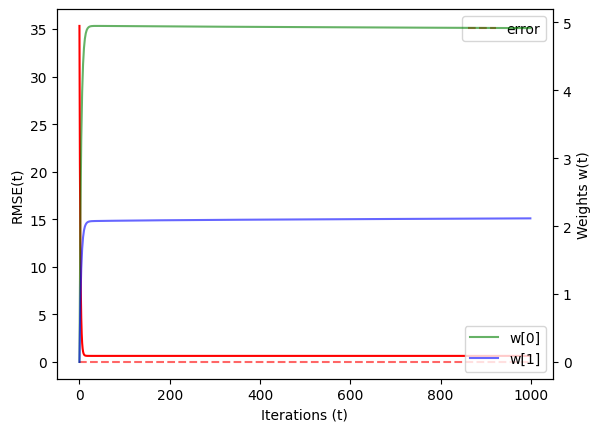

In [ ]:

final_weights = model.w
print("--- Pesos Finais Aprendidos (w) ---")
print(f"w0 (Bias/Intercepto): {final_weights[0][0]:.4f}")
print(f"w1 (Peso para 'alcohol'): {final_weights[1][0]:.4f}")
print(f"w2 (Peso para 'density'): {final_weights[2][0]:.4f}")


print("\n--- Gráficos de Convergência ---")
observer.plot()